<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
<h4>بهره‌گیری بیشتر از اشیا با استفاده از توصیف کننده ها (Descriptors) </h4>
<br>
این فصل به معرفی مفهومی جدید و پیشرفته در توسعه‌ی پایتون می‌پردازد که شامل descriptors است. این مفهوم برای بسیاری از برنامه‌نویسان زبان‌های دیگر ناآشنا است، زیرا معادل یا تشابه ساده‌ای برای آن در دیگر زبان‌ها وجود ندارد.Descriptors یکی دیگر از ویژگی‌های منحصربه‌فرد پایتون است که برنامه‌نویسی شی‌گرا را به سطحی جدید ارتقا می‌دهد. این قابلیت به کاربران اجازه می‌دهد تا انتزاعات قدرتمندتر و قابل استفاده مجدد بسازند. در اغلب موارد، پتانسیل کامل descriptors در کتابخانه‌ها یا فریم‌ورک‌ها مشهود استدر این فصل، اهداف زیر را که به descriptors مربوط می‌شوند، دنبال خواهیم کرد:
        <ul>
            <li>درک اینکه descriptors چیستند، چگونه کار می‌کنند و چطور می‌توان آن‌ها را به‌طور مؤثر پیاده‌سازی کرد.</li>
            <li>تحلیل دو نوع descriptors (data و non-data descriptors) از نظر تفاوت‌های مفهومی و جزئیات پیاده‌سازی آن‌ها.</li>
            <li>استفاده‌ی مؤثر از کد از طریق descriptors.</li>
            <li>بررسی مثال‌هایی از کاربردهای مناسب descriptors و نحوه بهره‌گیری از آن‌ها برای توسعه‌ی کتابخانه‌های API.</li>
        </ul>


<h4>نگاهی اولیه به Descriptors</h4>
ابتدا، مفهوم اصلی descriptors را بررسی می‌کنیم تا نحوه‌ی عملکرد و مکانیزم داخلی آن‌ها را بهتر درک کنیم. پس از این‌که این موضوع روشن شد، فهمیدن نحوه‌ی عملکرد انواع مختلف descriptors آسان‌تر خواهد شد، که در بخش بعدی به آن می‌پردازیم وقتی ایده‌ی کلی پشت descriptors را درک کردیم، مثالی را بررسی خواهیم کرد که نشان می‌دهد چگونه استفاده از آن‌ها می‌تواند به یک پیاده‌سازی تمیزتر و مطابق‌تر با سبک برنامه‌نویسی پایتون منجر شود.


<h4>مکانیزم داخلی Descriptors</h4>
نحوه‌ی عملکرد descriptors چندان پیچیده نیست، اما مسئله‌ی اصلی اینجاست که جزئیات و ملاحظات زیادی وجود دارد که باید مد نظر قرار گیرد. بنابراین، جزئیات پیاده‌سازی در اینجا از اهمیت ویژه‌ای برخوردارند.برای پیاده‌سازی descriptors، حداقل به دو کلاس نیاز داریم:
<br>
1. کلاس مشتری (Client Class): این کلاس از قابلیت‌هایی که قصد داریم در descriptor پیاده‌سازی کنیم، بهره می‌برد. معمولاً این کلاس فقط یک مدل دامنه‌ای (domain model class) است، یا یک انتزاع عادی که برای راه‌حل خود ایجاد می‌کنیم.
<br>
2. کلاس Descriptor: این کلاس منطق اصلی descriptor را پیاده‌سازی می‌کند.
بنابراین، یک descriptor چیزی نیست جز یک شی که نمونه‌ای از کلاسی است که پروتکل descriptor را پیاده‌سازی کرده باشد.
<br>
<h4>پروتکل Descriptor</h4>
برای اینکه یک کلاس بتواند به عنوان descriptor عمل کند، رابط (interface) آن باید حداقل یکی از متدهای جادویی زیر (که بخشی از پروتکل descriptor از نسخه‌ی پایتون 3.6 به بعد هستند) را شامل شود:
<ul style="direction:ltr">
    <li>__get__</li>
    <li>__set__</li>
    <li>__delete__</li>
    <li>__set_name__</li>
</ul>
برای اهداف این مقدمه اولیه سطح بالا، از قراردادهای نامگذاری زیر استفاده خواهد شد:
<table>
        <thead>
            <tr>
                <th>نام</th>
                <th>معنی</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>ClientClass</td>
                <td>انتزاع در سطح دامنه که از قابلیت‌هایی که قرار است توسط descriptor پیاده‌سازی شود، استفاده خواهد کرد. این کلاس به عنوان مشتری descriptor شناخته می‌شود. این کلاس شامل یک ویژگی کلاس (به نام descriptor طبق این قرارداد) است که نمونه‌ای از DescriptorClass می‌باشد.</td>
            </tr>
            <tr>
                <td>DescriptorClass</td>
                <td>کلاسی که خود descriptor را پیاده‌سازی می‌کند. این کلاس باید برخی از متدهای جادویی ذکرشده که پروتکل descriptor را تشکیل می‌دهند، پیاده‌سازی کند.</td>
            </tr>
            <tr>
                <td>client</td>
                <td>نمونه‌ای از ClientClass.
مثال: ()client = ClientClass.</td>
            </tr>
            <tr>
                <td>descriptor</td>
                <td>نمونه‌ای از DescriptorClass.
مثال: ()descriptor = DescriptorClass.
این شیء یک ویژگی کلاس است که در ClientClass قرار می‌گیرد.</td>
            </tr>
        </tbody>
    </table>
<br>


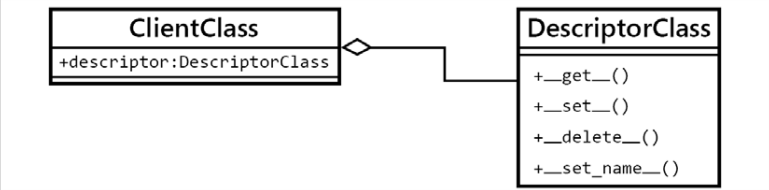

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
ClientClass ویژگی‌ای به نام descriptor دارد.<br>
descriptor نمونه‌ای از کلاس DescriptorClass است.<br>
DescriptorClass منطق و متدهای جادویی پروتکل descriptor را شامل می‌شود:<br>
<ul>
    <li>__get__، برای دریافت مقدار.</li>
    <li>__set__، برای تنظیم مقدار.</li>
    <li>__delete__، برای حذف مقدار.</li>
    <li>__set_name__، برای تنظیم نام ویژگی در زمان تعریف.</li>
</ul>
یک نکته‌ی بسیار مهم که باید به خاطر داشته باشید این است که برای عملکرد این پروتکل، شیء descriptor باید به‌عنوان یک ویژگی کلاس تعریف شود. اگر این شیء به‌عنوان یک ویژگی نمونه (instance attribute) ایجاد شود، کار نخواهد کرد. بنابراین، این شیء باید در بدنه‌ی کلاس تعریف شود، نه در متد __init__.
<br>
نکته‌ی دیگری که باید به آن توجه کرد این است که می‌توان پروتکل descriptor را به‌صورت جزئی پیاده‌سازی کرد. به این معنا که نیازی نیست همیشه تمام متدهای آن را تعریف کنیم؛ بلکه می‌توانیم فقط متدهایی که نیاز داریم را پیاده‌سازی کنیم، همان‌طور که به زودی خواهیم دید.
<br>
<h4>سوال: همه این‌ها در زمان اجرا چطور با هم کار می‌کنند؟</h4>
حال که عناصر و تعاملات آن‌ها را می‌شناسیم، گام بعدی این است که بفهمیم این ساختار چطور در زمان اجرا (runtime) کنار هم قرار می‌گیرد.
<br>
به طور معمول، زمانی که یک کلاس معمولی داریم و به ویژگی‌های آن دسترسی پیدا می‌کنیم، به سادگی اشیایی را دریافت می‌کنیم که انتظار داریم، حتی اگر آن ویژگی‌ها property باشند. به عنوان مثال:

In [3]:
class Attribute:
    value = 42  

class Client:
    attribute = Attribute()  

client = Client()


print(client.attribute)  


print(client.attribute.value)


42


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
اما در مورد توصیف‌گرها، اتفاق متفاوتی می‌افتد. وقتی یک شیء به عنوان ویژگی یک کلاس تعریف می‌شود (و این ویژگی یک توصیف‌گر است)، وقتی یک کاربر درخواست این ویژگی را می‌کند، به جای دریافت خود شیء (چیزی که از مثال قبلی انتظار داشتیم)، نتیجه‌ی فراخوانی متد جادویی __get__ را دریافت می‌کنیم.
بیایید با کد ساده‌ای شروع کنیم که فقط اطلاعاتی در مورد زمینه (context) ثبت می‌کند و همان شیء کاربر را باز می‌گرداند.

In [2]:
class DescriptorClass:
    def __get__(self, instance, owner):
        if instance is None:
            return self
        # پیام ساده برای نمایش اطلاعات (اختیاری)
        print(f"DescriptorClass.__get__ called with instance={instance}, owner={owner}")
        return instance

class ClientClass:
    descriptor = DescriptorClass()

client = ClientClass()
print(client.descriptor)



DescriptorClass.__get__ called with instance=<__main__.ClientClass object at 0x00000298F5C23250>, owner=<class '__main__.ClientClass'>


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
<b>کاوش در هر متد از پروتکل توصیف‌گر</b>
        <br>
تا به حال، ما نمونه‌های زیادی از توصیف‌گرها را مشاهده کرده‌ایم که در حال اجرا هستند و ایده‌ای از نحوه عملکرد آنها به دست آورده‌ایم. این مثال‌ها اولین نگاه ما به قدرت توصیف‌گرها را فراهم کردند، اما ممکن است شما در مورد جزئیات پیاده‌سازی و اصطلاحاتی که توضیح نداده‌ایم، کنجکاو باشید.از آنجایی که توصیف‌گرها فقط اشیاء هستند، این متدها self را به عنوان اولین پارامتر دریافت می‌کنند. برای همه آنها، این فقط به معنای خود شیء توصیف‌گر است.در این بخش، هر متد از پروتکل توصیف‌گر را به طور کامل کاوش خواهیم کرد، توضیح خواهیم داد که هر پارامتر چه مفهومی دارد و چگونه قصد داریم از آنها استفاده کنیم. 
<br>
<br>
<h3>متد get</h3>
امضای این متد جادویی به شکل زیر است:<br>
get__(self, instance, owner)__

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
پارامتر اول، instance، به شیء‌ای اشاره دارد که از آن توصیف‌گر فراخوانی می‌شود. در اولین مثال ما، این به معنی شیء کاربر (client) است.<br>
پارامتر owner به کلاسی اشاره دارد که شیء از آن مشتق شده است، که در مثال ما (از شکل 6.1)، کلاس ClientClass خواهد بود.<br>
ز پاراگراف قبلی می‌توان نتیجه گرفت که پارامتر نام‌گذاری‌شده به عنوان instance در امضای متد __get__، شیء‌ای است که توصیف‌گر بر روی آن عمل می‌کند، و owner کلاس شیء است. ممکن است خواننده هوشمند بپرسد چرا امضا به این صورت تعریف شده است. در نهایت، کلاس می‌تواند مستقیماً از instance استخراج شود (__owner = instance.__class). یک حالت خاص وجود دارد زمانی که توصیف‌گر از کلاس (ClientClass) فراخوانی می‌شود و نه از شیء (client)، در آن صورت مقدار instance برابر با None خواهد بود، اما ممکن است همچنان بخواهیم در این حالت پردازش‌هایی انجام دهیم. به همین دلیل است که پایتون انتخاب کرده است که کلاس را به عنوان یک پارامتر جداگانه ارسال کند.<br>
با استفاده از کد ساده زیر، می‌توانیم تفاوت بین فراخوانی یک توصیف‌گر از کلاس یا از شیء را نشان دهیم. در این حالت، متد __get__ دو کار جداگانه برای هر کدام انجام می‌دهد:

In [3]:
 # descriptors_methods_1.py
 class DescriptorClass:
     def __get__(self, instance, owner):
         if instance is None:
             return f"{self.__class__.__name__}.{owner.__name__}"
         return f"value for {instance}"
 class ClientClass:
    descriptor = DescriptorClass()

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height200%;">
    <font size=4>
انجام میشود یک کار انجام میشود یعنی ترکیب فضای نامی با نام کلاس ها ClientClassوقتی فراخوانی مستقیما از 

In [13]:
ClientClass.descriptor

'DescriptorClass.ClientClass'

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
و سپس اگر آن را از شیء‌ای که ایجاد کرده‌ایم فراخوانی کنیم، پیام دیگری را باز می‌گرداند و اطلاعاتی دیگری را که برای نمونه است به ما میدهد:

In [11]:
 ClientClass().descriptor

'value for <__main__.ClientClass object at 0x0000026AB5BA3D60>'

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
به طور کلی، مگر اینکه واقعاً نیاز داشته باشیم با پارامتر owner کاری انجام دهیم، رایج‌ترین روش این است که وقتی instance برابر با None است، خود توصیف‌گر را بازگردانیم. این به این دلیل است که وقتی کاربران توصیف‌گر را از کلاس فراخوانی می‌کنند، احتمالاً انتظار دارند خود توصیف‌گر را دریافت کنند، بنابراین این منطقی است. اما البته، این موضوع بستگی به مثال دارد (در ادامه فصل، استفاده‌های مختلف به همراه توضیحاتشان را خواهیم دید).<br>
<b>متد set</b>
        <br>
امضای این متد به شکل زیر است:<br>
set__(self, instance, value)__<br>
این متد زمانی فراخوانی می‌شود که ما سعی کنیم چیزی را به یک توصیف‌گر نسبت دهیم. این متد با بیانیه‌هایی مانند موارد زیر فعال می‌شود، جایی که توصیف‌گر یک شیء است که متد ()__set__ را پیاده‌سازی کرده است. پارامتر instance در این حالت برابر با client خواهد بود و value برابر با رشته "value" خواهد بود:

In [14]:
 client.descriptor = "value"

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
کاربردهای __set__:<br>
1_ کنترل مقداردهی: می‌توانید قبل از مقداردهی، مقدار را بررسی، تبدیل یا محدود کنید.<br>
2_ اعتبارسنجی: اطمینان حاصل کنید که مقدار ویژگی قوانین خاصی را رعایت می‌کند.<br>
3_ محافظت از داده‌ها: جلوگیری از تغییر مستقیم مقادیر حساس.<br>
4_ پیاده‌سازی رفتارهای خاص: مثل ذخیره مقدار در یک مکان دیگر (مانند دیتابیس) به جای ذخیره در دیکشنری نمونه.<br>
<br>
لیست زیر نشان می‌دهد که چگونه می‌توانیم از این متد استفاده کنیم تا اشیای اعتبارسنجی عمومی برای ویژگی‌ها ایجاد کنیم. این اشیا می‌توانند به صورت پویا با استفاده از توابعی ساخته شوند که مقادیر را قبل از اختصاص دادن به شیء اعتبارسنجی می‌کنند:

In [17]:
from typing import Callable, Any

class Validation:
    def __init__(self, validation_function: Callable[[Any], bool], error_msg: str) -> None:
        self.validation_function = validation_function
        self.error_msg = error_msg
        
    def __call__(self, value):
        if not self.validation_function(value):
            raise ValueError(f"{value!r} {self.error_msg}")


class Field:
    def __init__(self, *validations):
        self._name = None
        self.validations = validations
        
    def __set_name__(self, owner, name):
        self._name = name
        
    def __get__(self, instance, owner):
        if instance is None:
            return self
        return instance.__dict__[self._name]
        
    def validate(self, value):
        for validation in self.validations:
            validation(value)
            
    def __set__(self, instance, value):
        self.validate(value)
        instance.__dict__[self._name] = value


class ClientClass:
    descriptor = Field(
        Validation(lambda x: isinstance(x, (int, float)), "is not a number"),
        Validation(lambda x: x >= 0, "is not >= 0"),
    )


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
می‌توانیم عملکرد این شیء را در لیست زیر مشاهده کنیم:

In [62]:
client = ClientClass()
client.descriptor = 42  #call set method
client.descriptor       #call get method

42

In [ ]:
client.descriptor = -42

In [ ]:
client.descriptor = "invalid value"

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
ایده این است که چیزی که معمولاً در یک ویژگی (property) قرار می‌دادیم، می‌تواند به یک توصیف‌گر انتزاع شود و چندین بار استفاده مجدد شود. در این مورد، متد __set__() همان کاری را انجام می‌دهد که @property.setter انجام می‌داد.این مکانیزم عمومی‌تر از استفاده از ویژگی‌ها است، زیرا همان‌طور که بعداً خواهیم دید، ویژگی‌ها یک حالت خاص از توصیف‌گرها هستند.<br>
<h6>متد delete</h6>
امضای متد delete ساده‌تر است و به شکل زیر است:<br>
delete__(self, instance)__<br>
 این متد با بیانیه زیر فراخوانی می‌شود، که در آن self ویژگی توصیف‌گر و instance شیء کاربر (client) در این مثال خواهد بود.<br>
<b>عملکرد __delete__</b>
        <br>
هنگامی که دستور del instance.attribute اجرا می‌شود:<br>
پایتون بررسی می‌کند که آیا ویژگی (attribute) یک descriptor است یا خیر.<br>
اگر descriptor دارای متد __delete__ باشد، آن متد فراخوانی می‌شود.<br>
درون متد، می‌توانید مشخص کنید که چه اتفاقی هنگام حذف ویژگی رخ دهد.<br>

In [ ]:
del instance.attribute
del client.descriptor

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
در مثال زیر، از این متد برای ایجاد یک توصیف‌گر استفاده می‌کنیم که هدف آن جلوگیری از حذف ویژگی‌ها از یک شیء بدون داشتن امتیازات مدیریتی لازم است. توجه کنید که در این حالت، توصیف‌گر دارای منطقی است که برای پیش‌بینی مقادیر شیء‌ای که از آن استفاده می‌کند، به کار می‌رود، به جای اینکه بر روی اشیاء مرتبط دیگر اعمال شود:

In [26]:
# descriptors_methods_3.py
class ProtectedAttribute:
    def __init__(self, requires_role=None) -> None: 
        self.permission_required = requires_role
        self._name = None

    def __set_name__(self, owner, name):
        self._name = name
        
    def __set__(self, user, value):
        if value is None:
            raise ValueError(f"{self._name} can't be set to None")
        user.__dict__[self._name] = value
        
    def __delete__(self, user):
        if self.permission_required in user.permissions:
            user.__dict__[self._name] = None
        else:
            raise ValueError(
                f"User {user!s} doesn't have {self.permission_required} " "permission")


class User:
    """Only users with "admin" privileges can remove their email 
    address."""
    email = ProtectedAttribute(requires_role="admin")
    
    def __init__(self, username: str, email: str, permission_list: list 
     = None) -> None:
        self.username = username
        self.email = email
        self.permissions = permission_list or []

    def __str__(self):
         return self.username

In [27]:
admin = User("root", "root@d.com", ["admin"])
user = User("user", "user1@d.com", ["email", "helpdesk"]) 
admin.email  # call __get__ method

'root@d.com'

In [28]:
del admin.email
admin.email is None

True

In [29]:
user.email

'user1@d.com'

In [ ]:
user.email = None

In [ ]:
del user.email

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
در اینجا، در این توصیف‌گر ساده، مشاهده می‌کنیم که می‌توانیم ایمیل را فقط از کاربرانی که مجوز "مدیر" دارند حذف کنیم. برای بقیه کاربران، زمانی که سعی کنیم از دستور del برای حذف آن ویژگی استفاده کنیم، یک استثناء ValueError دریافت خواهیم کرد.
به طور کلی، این متد از توصیف‌گر به اندازه دو متد قبلی به طور رایج استفاده نمی‌شود، اما برای تکمیل این بخش نمایش داده شده است.<br>
<b>متد set name</b>
        <br>
این متد نسبتاً جدید است که در پایتون 3.6 اضافه شده و ساختار آن به این صورت است:<br>
 set_name__(self, owner, name)__
 

In [64]:
class Descriptor:
    def __set_name__(self, owner, name):
        self._name = name 
        print(f"Descriptor added as {name} to {owner.__name__}")

class MyClass:
    attr = Descriptor()  


Descriptor added as attr to MyClass


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
وقتی MyClass تعریف می‌شود:<br>
ویژگی attr به کلاس اضافه می‌شود.<br>
متد __set_name__ از کلاس Descriptor به‌طور خودکار فراخوانی می‌شود.<br>
مقدار owner برابر MyClass و مقدار name برابر "attr" است.<br>
نام ویژگی (یعنی attr) در متغیر self._name ذخیره می‌شود.<br>
<br>

In [4]:
class Field:
    def __init__(self):
        self._name = None

    def __set_name__(self, owner, name):
        self._name = name  # ذخیره نام ویژگی

    def __get__(self, instance, owner):
        return instance.__dict__.get(self._name, None)

    def __set__(self, instance, value):
        instance.__dict__[self._name] = value

class Client:
    field = Field()

client = Client()
client.field = 42
print(client.field)


42


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
وقتی کلاس Client تعریف می‌شود، ویژگی field به آن اضافه می‌شود و متد __set_name__ فراخوانی می‌شود.<br>
نام ویژگی (field) در متغیر _name درون descriptor ذخیره می‌شود.<br>
حالا وقتی به client.field مقدار اختصاص می‌دهیم یا آن را می‌خوانیم، descriptor می‌داند به کدام ویژگی (_name) در __dict__ اشاره کند.<br>
<br>
در پایتون 3.6، متد جدیدی به نام __set_name__ معرفی شد که به ما کمک می‌کند از نوشتن دوباره نام ویژگی در توصیف‌گرها جلوگیری کنیم. معمولاً در توصیف‌گرها باید نام ویژگی را به صورت دستی در دو جا بنویسیم: یک بار درون کلاس و یک بار دیگر به عنوان پارامتر در توصیف‌گر. با استفاده از __set_name__، این نام به صورت خودکار از کلاس اصلی دریافت و ذخیره می‌شود. این کار کد را تمیزتر و کاراتر می‌کند. در نتیجه، نیاز به تعریف نام ویژگی به صورت دستی از بین می‌رود.<br>
<b>توصیف‌گرهای غیر داده‌ای</b>
        <br>
ابتدا با یک توصیف‌گر که فقط متد __get__ را پیاده‌سازی می‌کند شروع می‌کنیم و بررسی می‌کنیم که چگونه استفاده می‌شود:

In [36]:
class NonDataDescriptor:
    def __get__(self, instance, owner):
        if instance is None:
            return self
        return 42
class ClientClass:
    descriptor = NonDataDescriptor()

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
همانطور که معمولاً پیش می‌آید، اگر از توصیف‌گر درخواست کنیم، نتیجه‌ی اجرای متد __get__ آن را دریافت می‌کنیم:

In [37]:
client = ClientClass()
client.descriptor

42

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
اما اگر ویژگی توصیف‌گر را به چیز دیگری تغییر دهیم، دسترسی به این مقدار را از دست می‌دهیم و به جای آن چیزی که به آن اختصاص داده شده است، دریافت می‌کنیم.

In [38]:
client.descriptor = 43
client.descriptor

43

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
حال، اگر توصیف‌گر را حذف کنیم و دوباره از آن درخواست کنیم، بیایید ببینیم چه چیزی دریافت خواهیم کرد:

In [39]:
del client.descriptor
client.descriptor

42

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
بیایید آنچه که به تازگی اتفاق افتاد را مرور کنیم. زمانی که اولین بار شیء client را ایجاد کردیم، ویژگی توصیف‌گر در کلاس قرار داشت، نه در نمونه (instance). بنابراین، اگر از دیکشنری شیء client درخواست کنیم، آن دیکشنری خالی خواهد بود.

In [40]:
vars(client)

{}

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
سپس، زمانی که از ویژگی .descriptor درخواست می‌کنیم، هیچ کلیدی در __client.__dict با نام "descriptor" پیدا نمی‌شود، بنابراین به کلاس می‌رود، جایی که آن را پیدا می‌کند... اما تنها به عنوان یک توصیف‌گر، به همین دلیل است که نتیجه‌ی اجرای متد __get__ را باز می‌گرداند.<br>
اما بعد، زمانی که مقدار ویژگی .descriptor را به چیز دیگری تغییر می‌دهیم، آنچه که اتفاق می‌افتد این است که مقدار 99 به دیکشنری نمونه (instance) اضافه می‌شود، به این معنی که این بار دیکشنری خالی نخواهد بود:

In [41]:
client.descriptor = 99
vars(client)

{'descriptor': 99}

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
پس، زمانی که از ویژگی .descriptor درخواست می‌کنیم، ابتدا در شیء جستجو می‌کند (و این بار آن را پیدا می‌کند چون یک کلید به نام "descriptor" در ویژگی __dict__ شیء وجود دارد، همانطور که نتیجه‌ی vars نشان می‌دهد) و بدون نیاز به جستجو در کلاس، آن را باز می‌گرداند. به همین دلیل، پروتکل توصیف‌گر فراخوانی نمی‌شود و دفعه‌ی بعد که از این ویژگی درخواست کنیم، به جای آن، مقدار جدیدی که با 99 تغییر داده‌ایم را باز می‌گرداند.سپس، این ویژگی را با فراخوانی del حذف می‌کنیم، و آنچه که اتفاق می‌افتد این است که کلید "descriptor" از دیکشنری شیء حذف می‌شود، که ما را به حالت اول باز می‌گرداند، جایی که به طور پیش‌فرض به کلاس رجوع می‌شود و پروتکل توصیف‌گر فعال می‌شود.

In [42]:
del client.descriptor
vars(client)
client.descriptor

42

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
این به این معناست که اگر ویژگی مربوط به توصیف‌گر (descriptor) را به چیز دیگری اختصاص دهیم، ممکن است به‌طور تصادفی آن را خراب کنیم. چرا؟ زیرا توصیف‌گر حذف عملیات را مدیریت نمی‌کند (برخی از آن‌ها نیازی به این کار ندارند).به این نوع، توصیف‌گر غیر داده‌ای (non-data descriptor) گفته می‌شود، زیرا متد جادویی __set__ را پیاده‌سازی نمی‌کند، همان‌طور که در مثال بعدی خواهیم دید.<br>
<b>توصیف‌گرهای داده‌ای</b>
        <br>
حالا بیایید تفاوت استفاده از یک توصیف‌گر داده‌ای را بررسی کنیم. برای این کار، یک توصیف‌گر ساده دیگر ایجاد می‌کنیم که متد __set__ را پیاده‌سازی می‌کند:

In [46]:
class DataDescriptor:
    def __get__(self, instance, owner):
        if instance is None:
            return self
        return 42
    def __set__(self, instance, value):
        logger.debug("setting %s.descriptor to %s", instance, value)
        instance.__dict__["descriptor"] = value
class ClientClass:
    descriptor = DataDescriptor()

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
بیایید ببینیم مقدار بازگشتی توصیف‌گر (descriptor) چیست:

In [44]:
client = ClientClass()
client.descriptor

42

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
حالا بیایید سعی کنیم این مقدار را به چیز دیگری تغییر دهیم و ببینیم به جای آن چه چیزی باز می‌گرداند:

In [47]:
client.descriptor = 99
client.descriptor

42

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
مقداری که توسط توصیف‌گر بازگردانده شد تغییر نکرد. اما زمانی که مقدار متفاوتی به آن اختصاص می‌دهیم، باید به دیکشنری شیء تنظیم شود (مانند قبل):

In [49]:
vars(client)

{'descriptor': 99}

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
بنابراین، متد __set__() فراخوانی شد و واقعاً مقدار را در دیکشنری شیء تنظیم کرد. تنها این بار، وقتی این ویژگی را درخواست می‌کنیم، به‌جای استفاده از ویژگی __dict__ دیکشنری، توصیف‌گر اولویت پیدا می‌کند (زیرا یک توصیف‌گر بازنویس‌کننده است).
یک نکته دیگرحذف این ویژگی دیگر کار نخواهد کرد:

In [ ]:
del client.descriptor
 # Traceback (most recent call last):
 #   ...
 # AttributeError: __delete__

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
دلیل این موضوع به شرح زیر است—با توجه به اینکه اکنون توصیف‌گر همیشه اولویت دارد، فراخوانی del روی یک شیء دیگر سعی نمی‌کند ویژگی را از دیکشنری آن (__dict__) حذف کند، بلکه به‌جای آن سعی می‌کند متد ()__delete__ توصیف‌گر را فراخوانی کند (که در این مثال پیاده‌سازی نشده است، و بنابراین خطای ویژگی رخ می‌دهد).
این تفاوت بین توصیف‌گرهای داده و غیر داده است. اگر توصیف‌گر متد ()__set__ را پیاده‌سازی کند، در این صورت همیشه اولویت خواهد داشت، صرف‌نظر از اینکه چه ویژگی‌هایی در دیکشنری شیء وجود دارند. اگر این متد پیاده‌سازی نشده باشد، ابتدا دیکشنری جستجو می‌شود و سپس توصیف‌گر اجرا خواهد شد.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <font size=4>
<br>
سؤالات زیادی می‌توان در مورد آن خط مطرح کرد، اما بیایید آن را به بخش‌های مختلف تقسیم کنیم.
اول، چرا فقط نام ویژگی "توصیف‌گر" را تغییر می‌دهد؟ این فقط یک ساده‌سازی برای این مثال است، اما همان‌طور که اتفاق می‌افتد، توصیف‌گر در این مرحله از نام ویژگی‌ای که به آن اختصاص داده شده است اطلاعی ندارد، بنابراین ما فقط از نامی که در مثال آمده بود استفاده کردیم، با دانستن اینکه این نام "descriptor" خواهد بود. این یک ساده‌سازی است تا مثال کد کمتری استفاده کند، اما می‌توان به‌راحتی این موضوع را با استفاده از متد __set_name__ که در بخش قبلی بررسی کردیم، حل کرد.
در یک مثال واقعی، شما یکی از دو کار را انجام می‌دهید—یا نام را به‌عنوان یک پارامتر دریافت کرده و آن را به‌صورت داخلی در متد __init__ ذخیره می‌کنید تا اینجا فقط از ویژگی داخلی استفاده شود، یا حتی بهتر، از متد __set_name__ استفاده می‌کنید.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">   
    <font size=4>
    همانطور که در فصل قبل دیدیم و تفاوتها را تحلیل کردیم و دیدیم که یک آرایش دهنده کلاس بهتر از متد جادویی در کلاس پایه است در اینجا نیز پیشنهاد میکنیم که توصیف گرها راه حل تمیزتری ارائه میدهند، پس از 
    متد جادویی دوری میکنیم و نحوه حل این مسئله با استفاده از توصیف گرها در بخش بعدی معرفی میشود 
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">   
    <font size=4>
        <h3>پیاده‌سازی متعارف</h3>
    اکنون به بررسی نحوه پاسخ دادن به سؤالات بخش قبلی با استفاده از یک توصیف‌گر (descriptor) خواهیم پرداخت که به اندازه کافی عمومی باشد تا در هر کلاسی قابل اعمال باشد. مجدداً باید تأکید کرد که این مثال واقعاً ضروری نیست، زیرا نیازمندی‌ها چنین رفتار عمومی‌ای را مشخص نکرده‌اند (ما حتی قانون سه نمونه از الگوی مشابه برای ایجاد انتزاع را در اینجا دنبال نکرده‌ایم)، اما این مثال با هدف نمایش عملکرد توصیف‌گرها ارائه شده است.
    <br>
        <br>
    اکنون یک توصیف‌گر عمومی ایجاد خواهیم کرد که با دریافت یک نام برای ویژگی‌ای که قرار است ردپای ویژگی دیگری را نگه دارد، مقادیر مختلف آن ویژگی را در یک لیست ذخیره می‌کند.
    <br>
    <br>
    همان‌طور که قبلاً اشاره کردیم، این کد بیشتر از چیزی است که برای حل مسئله نیاز داریم، اما هدف آن فقط نشان دادن این است که چگونه یک توصیف‌گر می‌تواند در این مورد به ما کمک کند. با توجه به ماهیت عمومی توصیف‌گرها، خواننده متوجه خواهد شد که منطق آن (نام متدها و ویژگی‌هایش) با مسئله دامنه موردنظر (یک شیء از نوع Traveler) مرتبط نیست. دلیل این امر این است که ایده توصیف‌گر این است که بتوان از آن در هر نوع کلاسی، احتمالاً در پروژه‌های مختلف، با نتایج یکسان استفاده کرد.
    <br>
    <br>
   برای رفع این نقص، برخی بخش‌های کد توضیح داده شده‌اند و توضیحات مربوط به هر قسمت (اینکه چه کاری انجام می‌دهد و چگونه به مسئله اصلی مرتبط است) در کد زیر ارائه شده است:

In [4]:
class HistoryTracedAttribute:
    def __init__(self, trace_attribute_name):
        self._name = None
        self.trace_attribute_name = trace_attribute_name #[1]

    def __set_name__(self, owner, name):
        self._name = name

    def __get__(self, instance, owner):
        if instance is None:
            return self
        return instance.__dict__[self._name]

    def __set__(self, instance, value):
        self._track_change_in_value_for_instance(instance, value)
        instance.__dict__[self._name] = value

    def _track_change_in_value_for_instance(self, instance, value):
        self._set_default(instance) #[2]
        if self._needs_to_track_change(instance, value):
            instance.__dict__[self.trace_attribute_name].append(value)

    def _needs_to_track_change(self, instance, value):
        try:
            current_value = instance.__dict__[self._name]
        except KeyError: #[3]
            return True
        return value != current_value #[4]

    def _set_default(self, instance):
        instance.__dict__.setdefault(self.trace_attribute_name, []) #[6]


class Traveler:
    current_city = HistoryTracedAttribute("cities_visited") #[1]

    def __init__(self, name: str, current_city: str):
        self.name = name
        self.current_city = current_city #[5]
        
traveler = Traveler("John", "New York")return value != current_value #[4]

    def _set_default(self, instance):
        instance.__dict__.setdefault(self.trace_attribute_name, []) #[6]


class Traveler:
    current_city = HistoryTracedAttribute("cities_visited") #[1]

    def __init__(self, name: str, current_city: str):
        self.name = name
        self.current_city = current_city #[
print(f"Initial city: {traveler.current_city}")
print(f"Cities visited: {traveler.cities_visited}")

traveler.current_city = "Los Angeles"
print(f"New city: {traveler.current_city}")
print(f"Cities visited: {traveler.cities_visited}")

traveler.current_city = "San Francisco"
print(f"Another city: {traveler.current_city}")
print(f"Cities visited: {traveler.cities_visited}")

Initial city: New York
Cities visited: ['New York']
New city: Los Angeles
Cities visited: ['New York', 'Los Angeles']
Another city: San Francisco
Cities visited: ['New York', 'Los Angeles', 'San Francisco']


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">      
    <font size=4>
ایده این توصیفگر انست که صفت جدیدی بعنوان مسئول ردیابی تغبیرات رخ داده در صفت دیگر بسازیم بدین منظور میتوان این صفات را بترتیب ردیاب و ردیابی شده، نامید.
        </font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">
    <h3>
برخی نشانه‌گذاری‌ها و توضیحات در مورد کد به شرح زیر است (اعداد موجود در لیست مربوط به شماره‌گذاری توضیحات در لیست قبلی می‌باشند):
    </h3>
</html>


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:250%;">
    <font size=3>
<br>1:
نام صفت یکی از متغیرهای انتساب یافته به توصیفگر است، در این مورد، <strong>current_city</strong> (صفت ردیابی شده). ما نام متغیری را که در آن تریس متغیر توصیفگر ذخیره خواهد شد، به توصیفگر می‌دهیم. در این مثال، به شیء خود می‌گوییم تا همه مقادیر current_city را در صفتی به نام <strong>cities_visited</strong> (ردیاب) ردیابی کند.
<br>2:
برای اولین بار که توصیفگر را در <strong>init</strong> فراخوانی می‌کنیم، صفتی برای ردیابی مقادیر وجود نخواهد داشت، در این صورت آن را به یک لیست خالی مقداردهی اولیه می‌کنیم تا مقادیر بعداً به آن اضافه شوند.
<br>3:
در متد <strong>init</strong>، نام صفت <strong>current_city</strong> نیز وجود نخواهد داشت، بنابراین می‌خواهیم این تغییر را نیز ردیابی کنیم. این معادل مقداردهی اولیه لیست با اولین مقدار در مثال قبلی است.
<br>4:
فقط تغییرات را زمانی ردیابی کنید که مقدار جدید با مقدار فعلی متفاوت باشد.
<br>5:
در متد <strong>init</strong>، توصیفگر از قبل وجود دارد و این دستور انتساب اقدامات مرحله 2 (ایجاد لیست خالی برای شروع ردیابی مقادیر) و مرحله 3 (اضافه کردن مقدار به این لیست و تنظیم آن به عنوان کلید در شیء برای بازیابی بعدی) را فرا می‌خواند.
<br>6:
متد <strong>setdefault</strong> در یک دیکشنری برای جلوگیری از خطای <strong>KeyError</strong> استفاده می‌شود. در این مورد، لیست خالی برای آن صفاتی که هنوز در دسترس نیستند باز می‌گردد (برای مرجع به a)
<br>


</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:300%;">
    <h2>
اشکال مختلف پیاده سازی توصیف گرها:
    </h2>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:300%;">
    <font size=4>
ابتدا به یک مسئله مشترک می پردازیم که خاص ماهیت توصیف گرهاست و سپس به روشهای پیاده سازی آنها می پردازیم بعبارت دیگر، ابتدا مسئله وضعیت اشتراکی سراسری(Global shared state) را تشریح کرده و سپس روشهای مختلف پیاده سازی را با توجه به این مسئله، بررسی میکنیم.
    </font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">       
    <font size=4.5>
     <strong> مسئله وضعیت اشتراکی سراسری </strong>      
    <br>
    همانطور که قبلا گفته شد. توصیف گرها باید بعنوان صفت کلاس در نظر گرفته شوند تا بدرستی عمل کنند. بیشتر اوقات این امر مشکل ساز نیست ولی نکاتی هست که باید به آنها توجه داشته باشیم.
    <br>
    مشکل صفات کلاس، آنست که بین همه نمونه های آن ،کلاس مشترک هستند. توصیف گرها نیز در این زمینه استثنا نیستند حال اگر بخواهیم داده ای در شیء توصیفگر ذخیره کنیم باید در نظر داشته باشیم که همه نمونه ها به مقدار یکسانی دستیابی خواهند داشت.
    <br>
    می خواهیم ببینیم وقتی<b> descriptor</b> بدرستی تعریف نشده و به جای ذخیره داده ها در هر شیء، داده ها را در خود نگهداری میکند چه اتفاقی رخ میدهد:
</html>

In [3]:
class SharedDataDescriptor:
    def __init__(self, initial_value):
        self.value = initial_value

    def __get__(self, instance, owner):
        if instance is None:
            return self
        return self.value

    def __set__(self, instance, value):
        self.value = value

class ClientClass:
    descriptor = SharedDataDescriptor("first value")


client = ClientClass()
print(client.descriptor)  

client.descriptor = "new value"
print(client.descriptor) 

another_client = ClientClass()
print(another_client.descriptor)


first value
new value
new value


In [3]:
class SharedDataDescriptor:
    def __init__(self, initial_value):
        self.value = initial_value

    def __get__(self, instance, owner):
        if instance is None:
            return self
        return self.value

    def __set__(self, instance, value):
        self.value = value

class ClientClass:
    descriptor = SharedDataDescriptor("first value")


client = ClientClass()
print(client.descriptor)  

client.descriptor = "new value"
print(client.descriptor) 

another_client = ClientClass()
print(another_client.descriptor)


first value
new value
new value


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:300%;">
    <font size=4>
        در این مثال شی descriptor خودش داده ها را ذخیره میکند حال مشکل آنست که وقتی مقدار یک نمونه تغییر میکند همه نمونه های آن کلاس نیز با این مقدار جدید تغییر پیدا می کنند.  
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">     
<font size=4>
می بینیم
که چطور تغییر یک شیء بطور ناگهانی باعث تغییر همه نمونه های کلاس میشود. دلیل آنست.
که ClientClass.descriptor یکتاست یعنی برای همه نمونه ها یک شیء یکسان است. در برخی موارد شاید این مسئله مطلوب باشد مثلا زمانی که پیاده سازی الگوی Borg داریم که در آن وضعیت مشترکی بین همه اشیای یک کلاس نگهداری میشود اما در حالت عمومی، این امر درست.
نیست و باید بین اشیاء تمایز قائل شویم این الگو با جزئیات بیشتر در فصل ۹ بررسی میشود

    
</font>    
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">     
<font size=4>
برای حل مسئله فوق توصیفگر باید از مقدار هر نمونه با اطلاع باشد و بر همان اساس آنرا برگشت دهد. به همین دلیل با دیکشنری (dict) نمونه ها کار میکنیم و مقادیر را در آن تنظیم و بازیابی میکنیم
<br>
    این معمولترین روش محسوب میشود علت اینکه نمیتوان از ()getaatr و ()setattr در این متدها استفاده کرد را قبلا ذکر کردیم در نتیجه ویرایش صفت dict آخرین گزینه است و در اینجا قابل
قبول میباشد
</font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">     
<font size=4>
<b>دستیابی به دیکشنری شئ:</b>
    <br>
    در این کتاب توصیف گرها بگونه ای پیاده سازی شده اند که شی descriptor مقادیر را در دیکشنری شیء ذخیره کند (__ dict__) و پارامترها را نیز از آنجا بازیابی نماید.
    <br>
</font>
</html>

In [4]:
class FixedDescriptor:
    def __init__(self, initial_value):
        self.initial_value = initial_value

    def __get__(self, instance, owner):
        if instance is None:
            return self
        return instance.__dict__.get(self.initial_value, self.initial_value)

    def __set__(self, instance, value):
        instance.__dict__[self.initial_value] = value


class ClientClass:
    descriptor = FixedDescriptor("descriptor_value")


client1 = ClientClass()
client2 = ClientClass()

print(client1.descriptor)  
print(client2.descriptor)  

client1.descriptor = "new value for client1"

print(client1.descriptor) 
print(client2.descriptor)  

descriptor_value
descriptor_value
new value for client1
descriptor_value


# <!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">     
<font size=4>
<b>استفاده از ارجاع ضعیف(Weak reference)</b>
    <br>
    گزینه دیگر در صورتی که نخواهیم از __dict__ استفاده کنیم آنست که شی descriptor خود مقادیر را برای هر نمونه در یک نگاشت(Mpping) داخلی ذخیره کند و از همان نگاشت برگشت دهد.
    <br>
    در اینجا یک خطر وجود دارد این نگاشت نمیتواند صرفا یک دیکشنری باشد چونکه کلاس client ارجاعی به توصیفگر دارد و توصیفگر ارجاع ها به اشیائی که استفاده میکند را ذخیره می کند، در نتیجه این امر باعث ایجاد وابستگی مدور خواهد شد و این اشیاء هرگز garbage-collect نمیشوند چونکه به یکدیگر اشاره دارند.
    <br>
    برای حل این مسئله دیکشنری باید از نوع کلید ضعیف باشد که در ماژول weakref تعریف شده است (۰1 WEAKREF).
    <br>
    در اینصورت کد descriptor را میتوان بصورت زیر نوشت:
</font>
</html>

In [7]:
from weakref import WeakKeyDictionary

class DescriptorClass:
    def __init__(self, initial_value):
        self.value = initial_value
        self.mapping = WeakKeyDictionary()

    def __get__(self, instance, owner):
        if instance is None:
            return self
        return self.mapping.get(instance, self.value)

    def __set__(self, instance, value):
        self.mapping[instance] = value


class ClientClass:
    descriptor = DescriptorClass("initial value")


client1 = ClientClass()
print(client1.descriptor)  
client2 = ClientClass()
print(client2.descriptor) 

client2.descriptor = "value for client 2"
print(client2.descriptor)  
print(client1.descriptor) 

initial value
initial value
value for client 2
initial value


# <!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">     
<font size=4>
بدین صورت مسئله حل میشود ولی باید به نکاتی توجه داشت:
    <br>
•	اشیاء صفات خود را نگهداری نمیکنند توصیفگر این کار را انجام میدهد.  اگر این مسئله فراموش شود ممکن است شیئی را با بررسی دیکشنری آن برای چیزهایی که در آنجا وجود ندارد درخواست کنیم (مثلا فراخوانی vars(client) داده کاملی را برگشت نمیدهد)
<br>
    <br>
•	لازم میشود که اشیاء قابل در هم سازی(Hashable)باشند در غیر اینصورت نمیتوانند بخشی از نگاشت باشند. در برخی کاربردها ممکن است این نیاز، قابل قبول نباشد یا مجبور شویم متدهای جادویی سفارشی __hash__ و__eq__ بنویسیم.
<br>
به دلایل ذکر شده پیاده سازی ای را ترجیح میدهیم که تاکنون در کتاب استفاده شده و از دیکشنری نمونه ها استفاده می کند. ولی به منظور کامل بودن ،مطلب گزینه دیگر را نیز معرفی کردیم.

</font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;"> 
    <font size=4>
<b> ملاحظات بیشتری در مورد توصیف گرها</b>
        <br>
        در این بخش ملاحظات عمومی در مورد توصیف گرها را بر اساس موارد زیر بیان میکنیم چه کاری میتوانیم با آنها انجام دهیم استفاده از آنها در چه زمانی ایده خوبی است و اینکه چه کارهایی که در ابتدا با روشهای دیگر حل میشود را میتوان به وسیله توصیف گرها بهبود داد ،سپس، نقاط ضعف و قوت پیاده سازی های اصلی را نسبت به پیاده سازی با توصیف گر تحلیل میکنیم
        <br>
</font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;"> 
    <font size=4>
<b>استفاده مجدد از کد</b>
        <br>
        توصیف‌گرها (Descriptors) ابزارهایی قدرتمند در پایتون هستند که می‌توانند به طور قابل توجهی به کدنویسی بهینه‌تر و جلوگیری از تکرار کد کمک کنند. به طور خاص، هنگامی که شما نیاز دارید چندین بار منطق مشابهی را برای مدیریت ویژگی‌ها یا رفتارهای اشیاء تکرار کنید، توصیف‌گرها راه حلی مناسب هستند. با استفاده از توصیف‌گرها می‌توانید منطق‌های عمومی را در یک مکان تعریف کرده و آن را در چندین قسمت از برنامه استفاده کنید، بدون نیاز به تکرار کد.
    </font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;"> 
    <font size=4>
<b>خصوصیت‌ها (Property) و توصیف‌گرها:</b>
<br>
خصوصیت‌ها در پایتون در واقع نوع خاصی از توصیف‌گرها هستند که با استفاده از دکوراتور property@ ایجاد می‌شوند. این دکوراتور به شما اجازه می‌دهد تا یک ویژگی را با رفتار خاص برای گرفتن (get)، تنظیم (set)، یا حذف (delete) پیاده‌سازی کنید. به عبارت دیگر، با استفاده از property@، می‌توانید یک متد را به‌گونه‌ای تعریف کنید که به‌طور خودکار هنگام دسترسی به ویژگی یا تنظیم آن فراخوانی شود.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
<b> گزینه ای در برابر آرایش دهنده های کلاس</b>
        <br>
        اگر آرایش دهنده های کلاس فصل ۵ برای سریال سازی شئ رویداد را به یاد داشته باشید کار را با پیاده سازی ای پایان دادیم (برای پایتون +3.7) که از دو آرایش دهنده کلاس استفاده می کند:
</font>
    </html>

In [ ]:
@Serialization(
    username="show_original",
    password="hide_field",
    ip="show_original",
    timestamp="format_time",
)
@dataclass
class LoginEvent:
    username: str
    password: str
    ip: str
    timestamp: datetime

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    اولی از نشانه‌گذاری برای اعلام متغیرها استفاده می‌کند، در حالی که دومی نحوه برخورد با هر فایل را تعریف می‌کند. بیایید ببینیم آیا می‌توانیم این دو آرایش‌دهنده را به توصیف‌گرها تغییر دهیم
       ؟ <br>
      ایده این است که یک توصیف‌گر ایجاد کنیم که تغییرات مورد نظر را روی مقادیر هر ویژگی اعمال کند و نسخه‌ی تغییر یافته را بر اساس نیازهای ما برگرداند (برای مثال، مخفی کردن اطلاعات حساس و فرمت‌بندی صحیح تاریخ‌ها).
    </html>


In [2]:
from dataclasses import dataclass
from datetime import datetime
from functools import partial
from typing import Callable


class BaseFieldTransformation:
    def __init__(self, transformation: Callable[[str], str]) -> None:
        self._name = None
        self.transformation = transformation

    def __get__(self, instance, owner):
        if instance is None:
            return self
        raw_value = instance.__dict__[self._name]
        return self.transformation(raw_value)

    def __set_name__(self, owner, name):
        self._name = name

    def __set__(self, instance, value):
        instance.__dict__[self._name] = value


ShowOriginal = partial(BaseFieldTransformation, transformation=lambda x: x)
HideField = partial(BaseFieldTransformation, transformation=lambda x: "**redacted**")
FormatTime = partial(
    BaseFieldTransformation,
    transformation=lambda ft: ft.strftime("%Y-%m-%d %H:%M"),
)


@dataclass
class LoginEvent:
    urnamese: ShowOriginal = ShowOriginal()
    password: HideField = HideField()
    ip: ShowOriginal = ShowOriginal()
    timestamp: FormatTime = FormatTime()


event = LoginEvent(
    username="user123",
    password="mypassword",
    ip="192.168.1.1",
    timestamp=datetime.now(),
)


print("Username:", event.username)  
print("Password:", event.password)  
print("IP Address:", event.ip)      
print("Timestamp:", event.timestamp)  


Username: user123
Password: **redacted**
IP Address: 192.168.1.1
Timestamp: 2024-12-08 17:24


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>    
 این توصیف‌گر با استفاده از یک تابع که یک آرگومان می‌گیرد و یک مقدار باز می‌گرداند، ایجاد شده است. این تابع، تبدیل یا transformation است که می‌خواهیم روی فیلد اعمال کنیم. از تعریف پایه که به‌طور عمومی نحوه عملکرد توصیف‌گر را مشخص می‌کند، سایر کلاس‌های توصیف‌گر به‌سادگی با تغییر تابع خاصی که هرکدام نیاز دارند، تعریف می‌شوند.
</font>
 </html>
    

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>   
    برای ساده نگه داشتن مثال، ما متدهای ()__init__ و ()serialize را پیاده‌سازی خواهیم کرد، اگرچه این متدها می‌توانند به‌طور جداگانه نیز انتزاعی شوند. با توجه به این ملاحظات، کلاس مربوط به رویداد اکنون به‌صورت زیر تعریف خواهد شد:

In [ ]:
@dataclass
class LoginEvent:
    username: str = ShowOriginal()
    password: str = HideField()
    ip: str = ShowOriginal()
    timestamp: datetime = FormatTime()
    
def serialize(self) -> dict:
    return {
        "username": self.username,
        "password": self.password,
        "ip": self.ip,
        "timestamp": self.timestamp,
}

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    حال رفتار شئ را در زمان اجرا مشاهده میکنیم:
    </font>
</html>

In [14]:
le = LoginEvent("john", "secret password", "1.1.1.1", datetime.utcnow())
vars(le)
print({'username': 'john', 'password': 'secret password', 'ip': '1.1.1.1', 'timestamp': ...})
print(le.serialize())
print({'username': 'john', 'password': '**redacted**', 'ip': '1.1.1.1', 'timestamp': '...'})
print(le.password)
print('**redacted**')

{'username': 'john', 'password': 'secret password', 'ip': '1.1.1.1', 'timestamp': Ellipsis}
{'username': 'john', 'password': '******', 'ip': '1.1.1.1', 'timestamp': '2024-12-08 14:08:46'}
{'username': 'john', 'password': '**redacted**', 'ip': '1.1.1.1', 'timestamp': '...'}
secret password
**redacted**


C:\Users\Martian\AppData\Local\Temp\ipykernel_17840\1323831416.py:1: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  le = LoginEvent("john", "secret password", "1.1.1.1", datetime.utcnow())


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
        تفاوت هایی با پیاده سازی قبلی که از آرایش دهنده استفاده میکرد دیده میشود. این مثال متد ( )serialize را اضافه کرده و فیلدها را قبل از ارائه به دیکشنری مخفی میسازد اما اگر در هر نقطه ای، هر یک از این صفات را از نمونه رویداد موجود در حافظه درخواست دهیم مقدار اصلی بدون اعمال هیچ گونه تبدیلی به آن برگشت داده میشود میتوان در زمان تنظیم مقدار تبدیلات را اعمال کرد و مستقیما در متد ( )__get__ برگشت داد.

</font>
    </html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    صرف‌نظر از این پیاده‌سازی، نکته این است که از آنجا که توصیفگرها اشیاء هستند، می‌توان مدل‌هایی ایجاد کرد و تمام قواعد برنامه‌نویسی شیءگرا را بر روی آن‌ها اعمال کرد.
الگوهای طراحی نیز برای توصیفگرها قابل استفاده هستند. ما می‌توانیم سلسله‌مراتب خود را تعریف کنیم، رفتارهای سفارشی را تنظیم کنیم و موارد مشابه را پیاده‌سازی کنیم.
<br>
این مثال اصل باز/بسته (Open/Closed Principle - OCP) را که در فصل 4 با عنوان اصول SOLID معرفی شد، رعایت می‌کند. دلیل آن این است که اضافه کردن یک روش تبدیل جدید تنها مستلزم ایجاد یک کلاس جدید است که از کلاس پایه مشتق شده و شامل تابع مورد نیاز خود باشد، بدون اینکه نیاز به تغییر کلاس پایه باشد.
<br>
بیایید مثالی را بررسی کنیم که در آن یک کلاس پایه ایجاد می‌کنیم که متدهای( ) __init__ و ( )serialize را پیاده‌سازی می‌کند، به طوری که بتوانیم کلاس LoginEvent را به سادگی با ساخت کلاس مشتق از آن تعریف کنیم، به شرح زیر:
</font>
</html>

In [69]:
class LoginEvent(BaseEvent):
    username = ShowOriginal()
    password = HideField()
    ip = ShowOriginal()
    timestamp = FormatTime()

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    نه تنها کلاس‌های هر رویداد ساده‌تر به نظر می‌رسند، بلکه خود توصیف‌گر نیز بسیار جمع و جورتر و ساده‌تر از دکوراتورهای کلاس است. پیاده‌سازی اصلی با دکوراتورهای کلاس خوب بود، اما توصیف‌گرها آن را حتی بهتر کردند.
</font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
<b> تحلیل توصیف گرها </b>
<br>
تاکنون با عملکرد توصیف گرها و برخی موقعیتهای مناسب برای استفاده از آنها در طراحی تمیز از طریق ساده سازی منطق و فشرده تر کردن کلاسها آشنا شدیم.
<br>
تا اینجا فهمیدیم که با استفاده از توصیف گرها میتوان کد تمیزتری داشت و منطق تکراری و پیاده سازی جزئیات را از هم جدا ساخت
        <br>
        اما از کجا بدانیم که پیاده سازی توصیف گرها را تمیز و درست انجام داده ایم؟ نشانه های توصیفگر خوب چیست؟ آیا از این ابزار به طور مناسب استفاده کرده ایم یا مهندسی بیش از حد(Over-engineering) روی آن انجام داده ایم؟

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
<b>پایتون چطور از توصیفگرهای داخلی استفاده میکند؟ </b>
<br>
چه چیزی یک توصیف‌گر (Descriptor) خوب را می‌سازد؟ یک پاسخ ساده این است که یک توصیف‌گر خوب تقریباً مانند هر شیء خوب دیگری در پایتون است. یعنی با خود پایتون سازگار است.
ایده‌ای که این فرض را دنبال می‌کند این است که با تحلیل نحوه استفاده پایتون از توصیف‌گرها، می‌توانیم درکی از پیاده‌سازی‌های خوب به دست آوریم تا بدانیم از توصیف‌گرهایی که می‌نویسیم چه انتظاری داشته باشیم.
<br>
 ما رایج‌ترین سناریوهایی را بررسی خواهیم کرد که در آن‌ها پایتون خود از توصیف‌گرها برای حل بخش‌هایی از منطق داخلی‌اش استفاده می‌کند

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
<b>توابع و متدها </b>
        <br>
بارزترین مورد از شیءهایی که توصیف‌گر هستند، یک تابع است. توابع متد __get__ را پیاده‌سازی می‌کنند، بنابراین می‌توانند  زمانی که داخل یک کلاس تعریف می‌شوندبه‌عنوان متد عمل کنند. در پایتون، متدها در واقع توابع عادی هستند که فقط یک آرگومان اضافی می‌گیرند. طبق معمول، اولین آرگومان یک متد با نام self مشخص می‌شود و نمایانگر یک نمونه از کلاسی است که متد در آن تعریف شده است. سپس هر کاری که متد با self انجام دهد، مشابه هر تابع دیگری است که شیء را دریافت کرده و تغییراتی روی آن اعمال می‌کند.
<br>
به عبارت دیگر، زمانی که چیزی به این صورت تعریف می‌کنیم:

In [ ]:
class MyClass:
    def method(self):
           self.x = 1

obj = MyClass() 
obj.method() 
print(obj.x)

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
عملا مانند آنست که بنویسم:

In [ ]:
class MyClass:
    pass

def method(myclass_instance: MyClass):
    myclass_instance.x = 1

obj = MyClass()
method(obj)  
print(obj.x)  

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
   این تنها یک تابع است که شیء را تغییر می‌دهد، فقط اینکه در داخل کلاس تعریف شده و گفته می‌شود که به شیء مرتبط (یا باند شده) است.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    زمانی که چیزی به این شکل فراخوانی می‌شود:

In [ ]:
instance = MyClass()
instance.method(...)

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
در واقع، پایتون کاری معادل با این انجام می‌دهد:

In [ ]:
instance = MyClass()
MyClass.method(instance, ...)

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
   توجه داشته باشید که این فقط یک تبدیل نحو است که به طور داخلی توسط پایتون مدیریت می‌شود. نحوه عملکرد این موضوع از طریق توصیف‌گرها (descriptors) است.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
بیایید این موضوع را با یک مثال بررسی کنیم تا ایده‌ای از آنچه ممکن است پایتون به صورت داخلی انجام دهد، به دست آوریم.
<br>
یک نمونه از کلاس Method قرار است به‌عنوان یک تابع یا متدی عمل کند که داخل یک کلاس دیگر استفاده می‌شود. این تابع فقط سه پارامتر خود را چاپ خواهد کرد: نمونه‌ای که دریافت کرده است (که همان پارامتر self در کلاسی است که در آن تعریف شده)، و دو آرگومان دیگر.
<br>
در متد ( )__call__، پارامتر self به جای اینکه یک نمونه از MyClass باشد، در واقع یک نمونه از Method است. پارامتر با نام instance قرار است یک شیء از نوع MyClass باشد.

In [18]:
class Method:
       def __init__(self, name):
              self.name = name
       def __call__(self, instance, arg1, arg2):
              print(f"{self.name}: {instance} called with {arg1} and {arg2}")
class MyClass:
       method = Method("Internal call")

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    با توجه به این ملاحضات و پس از ساخت شئ دو فراخوانی زیر عملا باید معادل باشند(بر اساس تعریف قبل):
    </div>

In [ ]:
instance = MyClass()
Method("External call")(instance, "first", "second")

In [ ]:
instance.method("first", "second")

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    با این حال، تنها اولی به درستی کار می‌کند، زیرا دومی خطا می‌دهد:

In [ ]:
Traceback (most recent call last):
File "file", line , in <module>
instance.method("first", "second")
TypeError: __call__() missing 1 required positional argument: 'arg2'

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
ما همان خطایی را مشاهده می‌کنیم که قبلاً در فصل ۵، استفاده از دکوریتورها برای بهبود کد ما با آن مواجه شدیم. آرگومان‌ها به سمت چپ جابه‌جا می‌شوند:
instance به جای self قرار می‌گیرد، "first" به جای instance ارسال می‌شود، و "second" به جای arg1. بنابراین چیزی برای مقداردهی به arg2 باقی نمی‌ماند.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
   برای رفع این مشکل، باید کلاس Method را به یک توصیف‌گر (descriptor) تبدیل کنیم.
به این ترتیب، زمانی که instance.method را فراخوانی می‌کنیم، ابتدا متد ()__get__ آن فراخوانی می‌شود، که در آن این شیء قابل فراخوانی به درستی به شیء مربوطه متصل می‌شود (با عبور از شیء به‌عنوان اولین پارامتر)، و سپس ادامه پیدا می‌کند.
<br>


In [20]:
from types import MethodType
class Method:
       def __init__(self, name):
              self.name = name
       def __call__(self, instance, arg1, arg2):
            print(f"{self.name}: {instance} called with {arg1} and {arg2}")
       def __get__(self, instance, owner):
             if instance is None:
                   return self
             return MethodType(self, instance)

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    حال هر دو فراخوانی طبق انتظار عمل میکنند:

In [ ]:
External call: <MyClass object at 0x...> called with first and second
Internal call: <MyClass object at 0x...> called with first and second

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    کاری که انجام دادیم این بود که تابع (در واقع شیء قابل فراخوانی که تعریف کرده بودیم) را با استفاده از MethodType از ماژول types به یک متد تبدیل کردیم.
اولین پارامتر این کلاس باید یک شیء قابل فراخوانی باشد (در این مورد، self به‌طور پیش‌فرض قابل فراخوانی است چون متد __call__ را پیاده‌سازی کرده است)، و پارامتر دوم شیئی است که این تابع به آن متصل می‌شود.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    <b>صفت های slots</b>
<br>
 ویژگی‌های یک شیء به‌صورت رشته در __dict__ آن ذخیره می‌شوند. به همین دلیل است که می‌توانیم به‌صورت پویا ویژگی‌های جدیدی به یک شیء اضافه کنیم یا ویژگی‌های فعلی را حذف کنیم. چیزی به نام تعریف "ثابت"(frozen) برای ویژگی‌های اشیا وجود ندارد که از قبل مشخص شده باشد. همچنین می‌توانیم به‌صورت پویا متدهایی را به یک شیء اضافه کنیم (که این کار را در مثال‌های قبلی انجام داده‌ایم).

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
        همه این موارد با ویژگی کلاس __slots__ تغییر میکند.
    در  پایتون، صفت‌های __slots__ یکی از ویژگی‌های کلاس‌ها هستند که به شما اجازه می‌دهند حافظه مورد استفاده برای اشیاء را بهینه کنید و به جای ذخیره اطلاعات اشیاء در یک دیکشنری داخلی (__dict__)، از یک آرایه ثابت استفاده کنید.
__slots__ یک لیست از نام صفت‌هایی است که یک کلاس می‌تواند داشته باشد. این ویژگی زمانی مفید است که شما نیاز دارید تعداد زیادی نمونه از یک کلاس را بسازید و می‌خواهید مصرف حافظه کاهش یابد.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    در این ویژگی، نام ویژگی‌هایی که در یک کلاس مجاز هستند را به‌صورت رشته تعریف می‌کنیم. از آن لحظه به بعد، نمی‌توانیم به‌صورت پویا ویژگی‌های جدیدی به نمونه‌های این کلاس اضافه کنیم. تلاش برای اضافه کردن ویژگی‌های اضافی به‌صورت پویا به کلاسی که __slots__ را تعریف کرده است، منجر به یک خطای AttributeError خواهد شد. با تعریف این ویژگی، کلاس به حالت ثابت درمی‌آید و دیگر ویژگی __dict__ نخواهد داشت که بتوانید به‌صورت پویا اشیای بیشتری به آن اضافه کنید.
    <br>
        <br>
    پس، اگر ویژگی‌های آن از دیکشنری شیء بازیابی نمی‌شوند، چگونه بازیابی می‌شوند؟ 
        <br>
        با استفاده از توصیف‌کننده‌ها (descriptors). هر نامی که در __slots__ تعریف شده باشد، توصیف‌کننده‌ی مخصوص به خود را خواهد داشت که مقدار را ذخیره می‌کند تا بعداً بتوان آن را بازیابی کرد:

In [26]:
from dataclasses import dataclass
@dataclass
class Coordinate2D:
       __slots__ = ("lat", "long")
       lat: float
       long: float
       def __repr__(self):
              return f"{self.__class__.__name__}({self.lat}, {self.long})"

point = Coordinate2D(51.5074, -0.1278)
print(point)

Coordinate2D(51.5074, -0.1278)


<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    با استفاده از __slots__، پایتون فقط به اندازه‌ای حافظه رزرو می‌کند که برای ویژگی‌های تعریف‌شده در آن لازم است، هنگامی که اشیای جدید ایجاد می‌شوند این باعث می‌شود که اشیا ویژگی __dict__ نداشته باشند، بنابراین نمی‌توان آن‌ها را به‌صورت پویا تغییر داد
    <br>
    و از آنجا که ویژگی __dict__ برای ذخیره مقادیر متغیرهای نمونه وجود ندارد، پایتون به‌جای آن یک توصیف‌کننده برای هر slot ایجاد می‌کند و مقدار را در آن ذخیره می‌کند. این باعث می‌شود که نتوانیم ویژگی‌های کلاس را با ویژگی‌های نمونه ترکیب کنیم 
    <br>
    به عنوان یک مزیت، اشیائی که با استفاده از slots تعریف می‌شوند، حافظه کمتری مصرف می‌کنند، زیرا تنها به یک مجموعه ثابت از فیلدها برای نگهداری مقادیر نیاز دارند و نه به یک دیکشنری کامل.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    <b>پیاده سازی توصیفگرها در آرایش دهنده</b>
        <br>
         نمونه‌هایی از مواردی را مشاهده کرده‌ایم که می‌توان دکوراتورها را با استفاده از تطبیق آن‌ها با پروتکل توصیف‌گر و به‌کارگیری متد ()__get__ برای انطباق دکوراتور با شیئی که با آن فراخوانی می‌شود، کارآمد کرد.  
<br>
فرمول کلی برای سازگار کردن یک دکوراتور به این شکل، پیاده‌سازی متد ()__get__ روی آن و استفاده از types.MethodType برای تبدیل آرایش دهنده(callable) به یک متد وابسته به شئ است که دریافت می‌کند (پارامتر نمونه‌ای(instance) که توسط __get__ دریافت می‌شود).
<br>
برای اینکه این کار انجام شود، باید آرایش دهنده را به‌عنوان یک شیء پیاده‌سازی کنیم، زیرا در غیر این صورت، اگر از یک تابع استفاده کنیم، آن تابع قبلاً یک متد ()__get__ دارد که کاری متفاوت انجام می‌دهد و بدون سازگار کردن آن، کار نخواهد کرد. روش تمیزتر برای پیش‌روی این است که یک کلاس برای آرایش دهنده تعریف کنیم.












<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4  color=#aa0025 >
    <b>برای تعریف آرایش دهنده ای که به متدهای کلاس اعمال میشود از کلاس آرایش دهنده استفاده کنید و متد ()__get__ را روی آن پیاده‌سازی کنید.</b>
    </div>
    </font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    <b>ملاحضات نهایی توصیفگرها</b>
    <br>
    برای جمع بندی تحلیل از توصیفگرها،برخی توصیه های کلی در زمینه کد تمیز و فعالیت های خوب تجربی در ادامه ارائه خواهد شد.

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    <b>واسط توصیفگرها </b>
    <br>
    وقتی در فصل ۴، اصول SOLID (حرف "I" در SOLID)  به اصل تفکیک رابط‌ها پرداختیم، گفتیم که این یک عمل خوب است که واسط ها را کوچک نگه داریم و به همین دلیل ممکن است بخواهیم آن‌ها را به واسط‌های کوچکتری تقسیم کنیم. این ایده دوباره در اینجا ظاهر می‌شود، نه به معنای واسط به‌عنوان یک کلاس پایه انتزاعی، بلکه به‌عنوان واسطی که خود توصیف‌کننده ارائه خواهد داد.
<br>
همان‌طور که قبلاً ذکر شد، پروتکل توصیف‌کننده شامل چهار متد است، اما پیاده‌سازی جزئی مجاز است. یعنی شما نیازی به پیاده‌سازی همه آن‌ها در تمام مواقع ندارید. در واقع، اگر تنها متدهای مورد نیاز حداقلی را پیاده‌سازی کنید، بهتر است.
<br>
بیشتر اوقات، خواهید دید که می‌توانید با پیاده‌سازی تنها متد __get__ نیازهای خود را برطرف کنید.







<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4  color=#aa0025 >
    <b>بیش از حد متدهای لازم را پیاده‌سازی نکنید. هرچه متدهای کمتری از پروتکل توصیف‌کننده را پیاده‌سازی کنید، بهتر است.
</b>
    </div>
    </font>
</html>

<!DOCTYPE html>
<html lang="fa">
<div  style="direction:rtl;line-height:200%;">  
    <font size=4>
    <b>طراحی شئ گرای توصیفگرها </b>
    <br>
    با این مفهوم، منظور این نیست که می‌توانیم توانایی‌های طراحی شئ گرا را تنها با استفاده از توصیف‌کننده‌ها بهبود دهیم (که قبلاً به آن پرداخته‌ایم). اما از آنجا که توصیف‌کننده‌ها فقط اشیای معمولی هستند، قوانین طراحی شی‌گرا نیز برای آن‌ها قابل اعمال است. برای مثال، می‌توانیم کلاس‌های پایه برای توصیف‌کننده‌ها داشته باشیم، از ارث‌بری برای ایجاد توصیف‌کننده‌های خاص‌تر استفاده کنیم و غیره.
    <br>
<br>
    به یاد داشته باشید که تمام قوانین و توصیه‌های شیوه‌های خوب نیز قابل اعمال هستند. برای مثال، اگر یک کلاس پایه برای یک توصیف‌کننده داشته باشید که تنها متد __get__ را پیاده‌سازی می‌کند، ایجاد یک زیرکلاس از آن که متد __set__ را نیز پیاده‌سازی کند، ایده خوبی نخواهد بود، زیرا این کار با اصل جانشینی لیسکوف (Liskov's substitution principle) مطابقت نخواهد داشت (چون ما نوع خاص‌تری داریم که یک رابط پیشرفته را پیاده‌سازی می‌کند که والد آن را ارائه نمی‌دهد).






